Using the Mauna Lua CO2 dataset (monthly) perform forecasting using an MLP and compare the results with that of MA (Moving Average) and ARMA (Auto Regressive Moving Average)  models. Main setting: use previous “K” readings to predict next “T” reading. Example, if “K=3” and “T=1” then we use data from Jan, Feb, March and then predict the reading for April. Comment on why you observe such results. For MA or ARMA you can use any library or implement it from scratch. The choice of MLP is up to you. [2 marks]


In [140]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load Mauna Loa CO2 dataset
data = pd.read_csv("data.csv")

In [141]:
data.index = pd.to_datetime(data[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))
data = data[~data['year'].isin([1958, 2024])]
data

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
1959-01-01,1959,1,1959.0411,315.58,315.55,-1,-9.99,-0.99
1959-02-01,1959,2,1959.1260,316.48,315.86,-1,-9.99,-0.99
1959-03-01,1959,3,1959.2027,316.65,315.38,-1,-9.99,-0.99
1959-04-01,1959,4,1959.2877,317.72,315.41,-1,-9.99,-0.99
1959-05-01,1959,5,1959.3699,318.29,315.49,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
2023-08-01,2023,8,2023.6250,419.68,421.59,21,0.45,0.19
2023-09-01,2023,9,2023.7083,418.51,421.99,18,0.30,0.14
2023-10-01,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
2023-11-01,2023,11,2023.8750,420.46,422.46,21,0.91,0.38


In [142]:
k=3
t=1

X = np.array([data[['average']][i:(i+k)] for i in range(len(data)-(k+t)+1)]).reshape(-1, k)
y = np.array([data[['average']][(i+k):(i+k+t)] for i in range(len(data)-(k+t)+1)]).reshape(-1, t)

X, X.shape, y.shape

(array([[315.58, 316.48, 316.65],
        [316.48, 316.65, 317.72],
        [316.65, 317.72, 318.29],
        ...,
        [421.83, 419.68, 418.51],
        [419.68, 418.51, 418.82],
        [418.51, 418.82, 420.46]]),
 (777, 3),
 (777, 1))

In [143]:
X_train = X[:611]
X_test = X[612:]

y_train = y[:611]
y_test = y[612:]

**MLP**

In [144]:
mlp_model = MLPRegressor(hidden_layer_sizes=[128, 256, 512, 256], max_iter = 10000)
mlp_model.fit(X_train, y_train)
y_hat_test = mlp_model.predict(X_test)

mse_mlp = mean_squared_error(y_test.flatten(), y_hat_test.flatten())
rmse_mlp = np.sqrt(mse_mlp)
rmse_mlp

c:\Users\hardi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.651189863691007

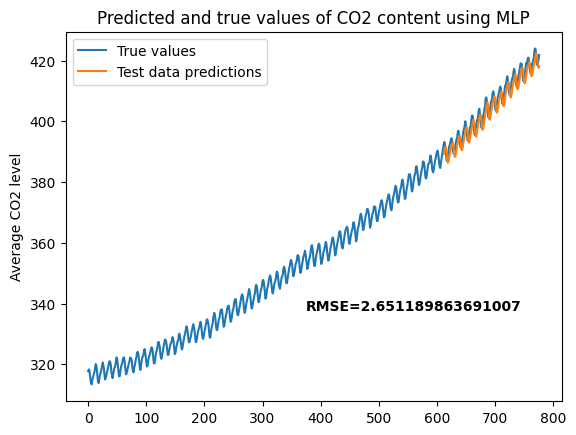

In [145]:
if t==1:
    fig = plt.figure()
    fig.text(0.5, 0.3, f'RMSE={rmse_mlp}', weight='bold')
    plt.plot(range(len(y)), y, label='True values')
    plt.plot(range(612, len(y)), y_hat_test, label='Test data predictions')
    plt.legend()
    plt.xlabel('')
    plt.ylabel('Average CO2 level')
    plt.title('Predicted and true values of CO2 content using MLP')
    plt.show()

In [ ]:
y_hat_test

In [ ]:
y_test

**Moving Average**

In [148]:
y_test_pred_ma = np.empty_like(y_test)
for i in range(y_test.shape[1]):
    model = ARIMA(y_test[:, i], order=(0,0,1))
    model_fit = model.fit()
    y_test_pred_ma[:, i] = model_fit.predict(start=0, end=y_test.shape[0]-1)

mse_ma = mean_squared_error(y_test.flatten(), y_test_pred_ma.flatten())
rmse_ma = np.sqrt(mse_ma)
print(rmse_ma)

y_test_pred_ma

5.2570427511239535


c:\Users\hardi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


array([[405.6023562 ],
       [399.13617915],
       [401.65157117],
       [398.64868045],
       [399.01141504],
       [396.87618219],
       [397.1627774 ],
       [397.08618288],
       [398.29908924],
       [398.12418356],
       [399.58037798],
       [398.6995183 ],
       [400.15665436],
       [399.36547197],
       [400.97725628],
       [399.01431448],
       [399.67830608],
       [396.77341716],
       [398.50334362],
       [396.75469841],
       [399.62646619],
       [398.37983708],
       [400.75295862],
       [399.16912053],
       [401.20641213],
       [400.9615881 ],
       [401.7200973 ],
       [399.99977903],
       [400.35017194],
       [398.10088058],
       [399.04023534],
       [398.07496634],
       [400.87513272],
       [399.48269072],
       [402.00547005],
       [400.76511221],
       [402.58117786],
       [401.7649091 ],
       [403.90219544],
       [400.63748685],
       [402.55116288],
       [398.61172856],
       [400.82441072],
       [398

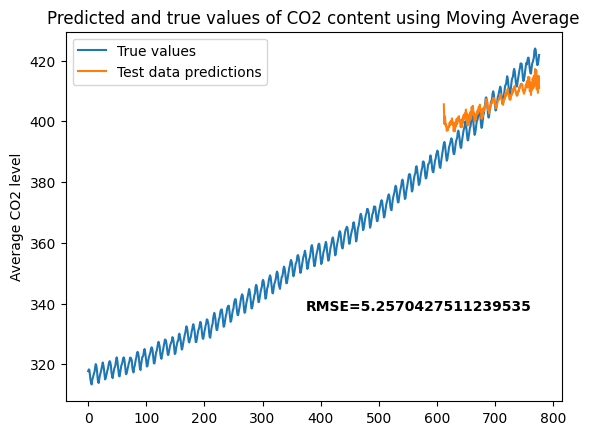

In [149]:
if t==1:
    fig = plt.figure()
    fig.text(0.5, 0.3, f'RMSE={rmse_ma}', weight='bold')
    plt.plot(range(len(y)), y, label='True values')
    plt.plot(range(612, len(y)), y_test_pred_ma, label='Test data predictions')
    plt.legend()
    plt.xlabel('')
    plt.ylabel('Average CO2 level')
    plt.title('Predicted and true values of CO2 content using Moving Average')
    plt.show()

**Auto Regressive Moving Average**

In [150]:
y_test_pred_arma = np.empty_like(y_test)
for i in range(y_test.shape[1]):
    model = ARIMA(y_test[:, i], order=(1,0,1))
    model_fit = model.fit()
    y_test_pred_arma[:, i] = model_fit.predict(start=0, end=y_test.shape[0]-1)

mse_arma = mean_squared_error(y_test.flatten(), y_test_pred_arma.flatten())
rmse_arma = np.sqrt(mse_arma)
print(rmse_arma)

y_test_pred_arma

1.4827895428074473


c:\Users\hardi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([[406.54087809],
       [392.73878706],
       [393.55016279],
       [391.84551665],
       [389.68398181],
       [387.99214313],
       [386.60455311],
       [388.13603197],
       [389.50494633],
       [390.45588667],
       [392.30839383],
       [392.02212534],
       [393.4263072 ],
       [393.57260434],
       [395.05908089],
       [393.36128004],
       [392.44143791],
       [389.1358461 ],
       [389.53519087],
       [389.13376391],
       [391.49096012],
       [392.56004972],
       [393.91368012],
       [394.23880511],
       [394.92711013],
       [397.40323843],
       [396.71886945],
       [395.49432867],
       [394.07703021],
       [391.77294681],
       [391.17486014],
       [391.47509725],
       [394.42689116],
       [394.77450803],
       [396.52340201],
       [397.4432117 ],
       [397.8823116 ],
       [399.19822411],
       [400.60607424],
       [397.73691983],
       [397.45057516],
       [394.18046263],
       [393.54737233],
       [394

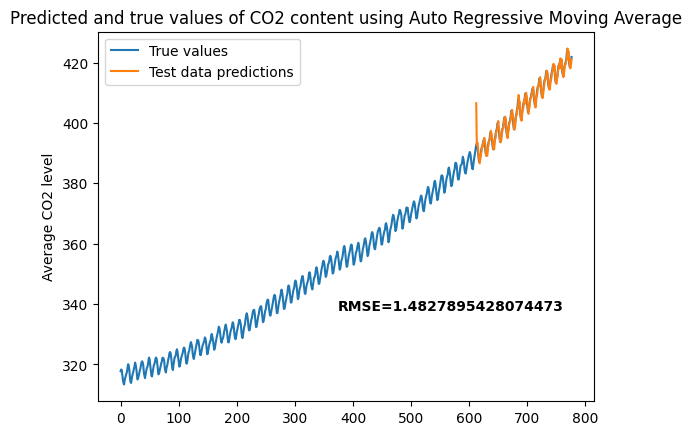

In [151]:
if t==1:
    fig = plt.figure()
    fig.text(0.5, 0.3, f'RMSE={rmse_arma}', weight='bold')
    plt.plot(range(len(y)), y, label='True values')
    plt.plot(range(612, len(y)), y_test_pred_arma, label='Test data predictions')
    plt.legend()
    plt.xlabel('')
    plt.ylabel('Average CO2 level')
    plt.title('Predicted and true values of CO2 content using Auto Regressive Moving Average')
    plt.show()